<h1 align="center"><b>Модульна контрольна робота</b></h1>

<p style="margin-left:60%">Роботу виконав студент групи <i>ФІ-21, <b>Беркута Володимир</b></i> </br> <i>Варіант №1</i></p>
<p style="margin-left:45%; font-size:1.7rem"><b>Завдання</b>:</p>
<p style="margin-left:35%">Визначити фрактальну розмірність фрактала, що складається з тих точок <br> відрізка [0; 1], в десятковому представленні яких відсутня цифра 4. <br> Розробити програмне забезпечення для побудови даного фрактала.</p>

Для вирішення завдання, будемо розглядати розрядність десятків тобто наступну множжину чисел 

$$\{0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0\}$$

представимо ці числа у виглядів проміжків 

$$\{[0.0; 0.1], (0.1; 0.2], (0.2; 0.3], (0.3; 0.4), [0.4; 0.5), [0.5; 0.6], (0.6; 0.7], (0.7; 0.8], (0.8; 0.9], (0.9; 1.0]\}$$

Далі видаляємо проміжок 

$$[0.4; 0.5)$$

Отримаємо результат наступний результат:

$$ [0.0; 0.4)\cup[0.5; 1.0] $$

Потім розглядаємо розрядність сотих &#x2192;

$$ [0.00; 0.04)\cup[0.05; 0.10)\cup[0.10; 0.14)\cup[0.15; 0.20)\cup[0.20; 0.24)\cup[0.25; 0.30)\cup[0.30; 0.34)\cup[0.35; 0.40)\cup[0.50; 0.54)\cup[0.55; 0.60)\cup[0.60; 0.64)\cup[0.65; 0.70)\cup[0.70; 0.74)\cup[0.75; 0.80)\cup[0.80; 0.84)\cup[0.85; 0.90)\cup[0.90; 0.94)\cup[0.95; 1.00] $$

і так далі...

Приклад коду &#x2193;

In [17]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import time

%matplotlib inline

In [84]:
def my_variant(iterations: int, animation: bool = False) -> np.array:
    Obj = np.array(1)
    fig, ax = plt.subplots(iterations+1, figsize=(20, 4*iterations))
    
    for it in range(iterations):
        
        # Реалізація анімації
        # if animation:
        #     scale_y = 10**(it-1)
        #     scale_y = int(scale_y)
        #     if scale_y == 0:
        #         print(scale_y)
        #         scale_y = 1
        #     plt.figure(figsize=(20, 2))
        #     plt.imshow([np.reshape(Obj, Obj.size)]*scale_y)
        #     clear_output(wait=True)
        #     plt.show()
        #     time.sleep(1)
        
        scale_y = 10**(it-1)
        scale_y = int(scale_y)
        if scale_y == 0:
            # print(scale_y)
            scale_y = 1
            
        ax[it].imshow([np.reshape(Obj, Obj.size)]*scale_y)
        ax[it].set_title(f"Ітерація №{it}")

        ax[it].set_xticks([-0.5, 
                           Obj.size-0.5], 
                          labels=["0", "1"])
        ax[it].set_yticks([0], labels=[""])
        
        Obj = np.array([Obj, Obj, Obj, Obj, 0*Obj, Obj, Obj, Obj, Obj, Obj])
    ax[-1].imshow([np.reshape(Obj, Obj.size)]*(10**(iterations-1)))
    ax[-1].set_title(f"Ітерація №{iterations}")
    ax[-1].set_xticks([-0.5, Obj.size-0.5], labels=["0", "1"])
    ax[-1].set_yticks([0], labels=[""])
    return np.linspace(0, 1, Obj.size)*np.reshape(Obj, Obj.size)

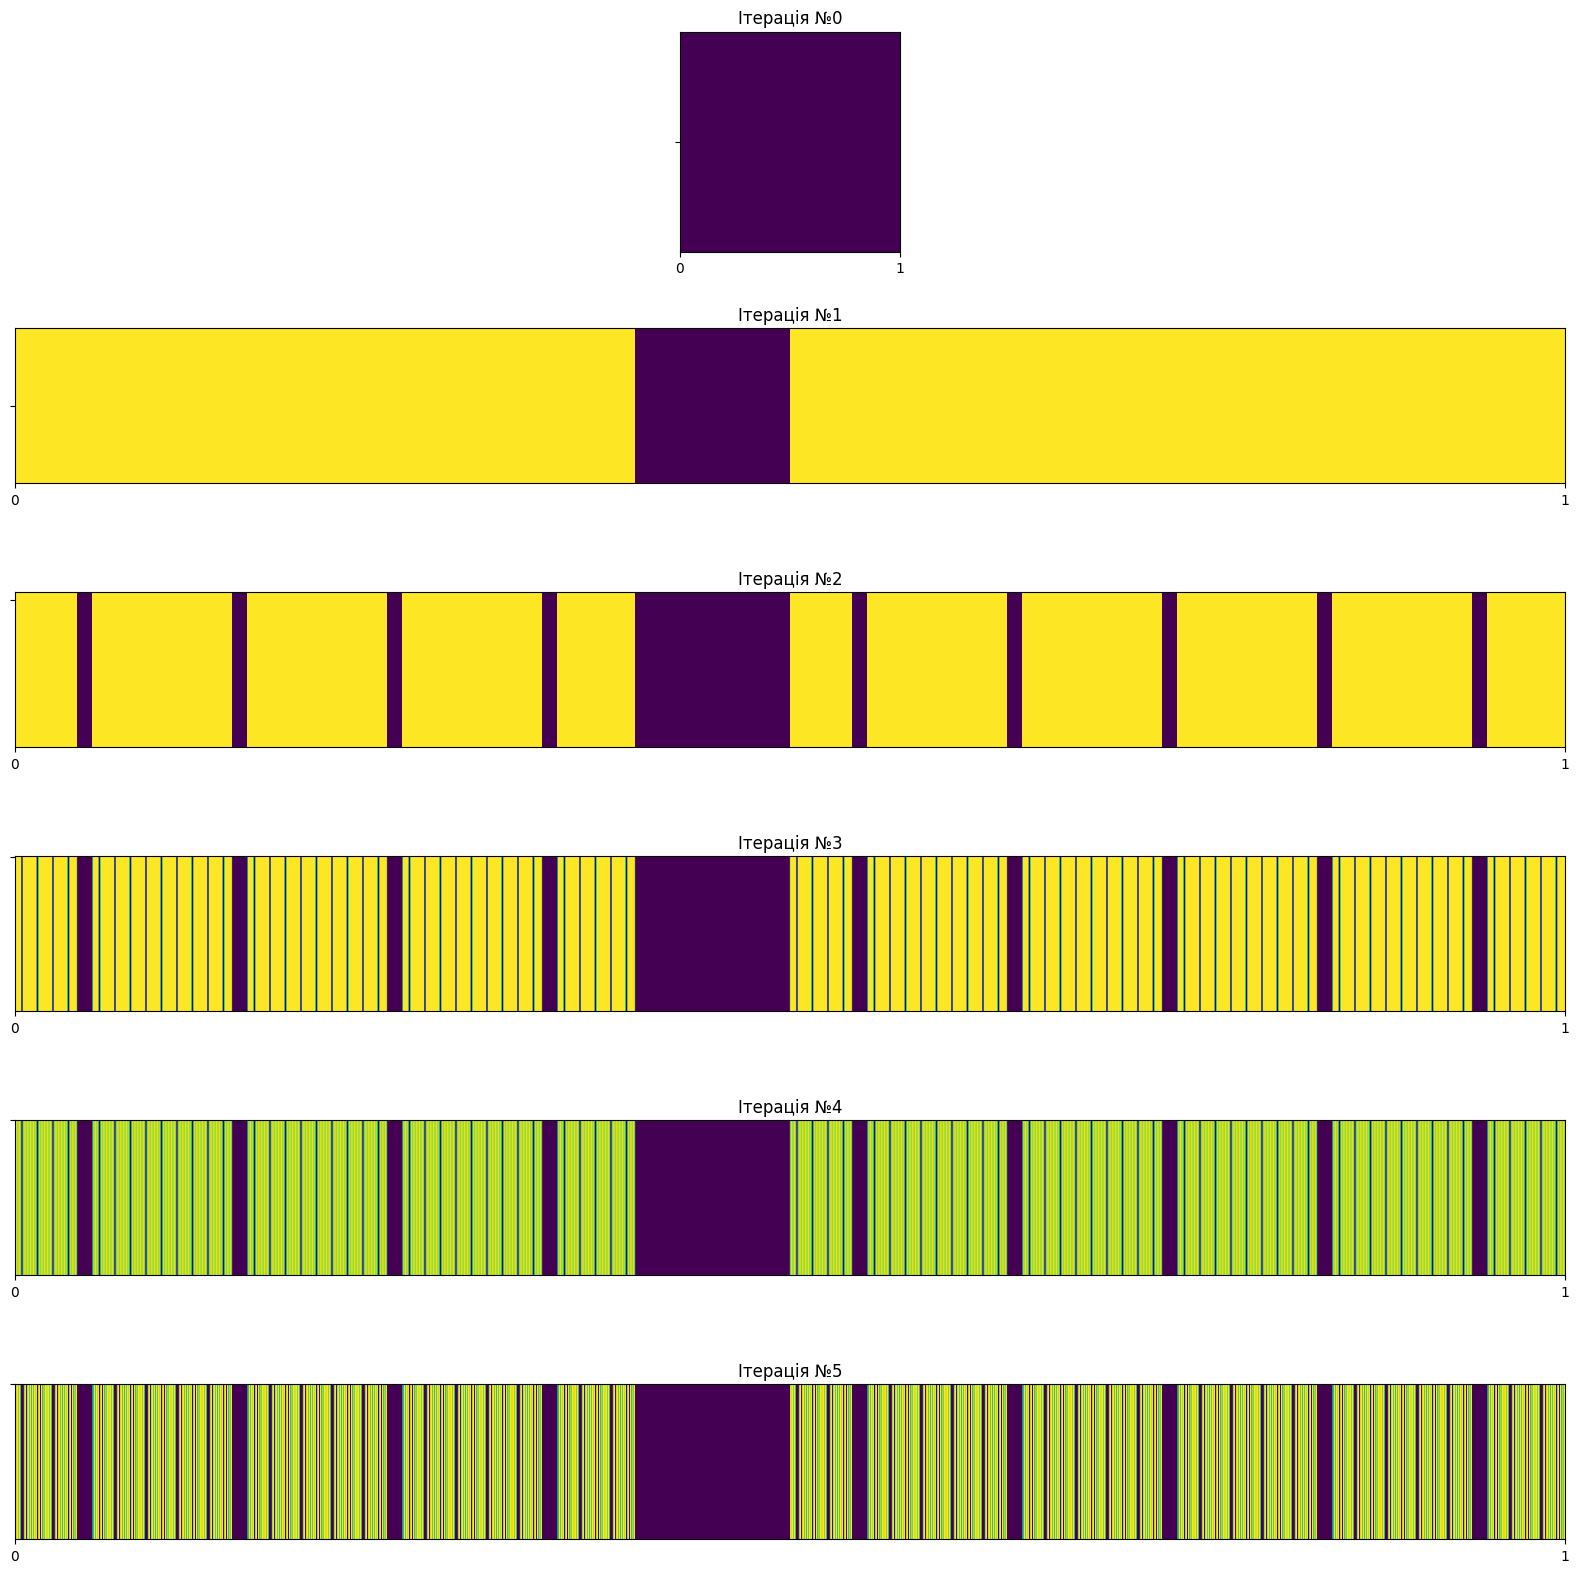

In [87]:
space_by_5it = my_variant(5, True)
# 5 ітерацій ліміт для відображення, на 6 ітерації вибиває помилку(Allocated memory error) [Зображення занадто велике](373 GiB)

In [88]:
space_by_5it

array([0.00000e+00, 1.00001e-05, 2.00002e-05, ..., 9.99980e-01,
       9.99990e-01, 1.00000e+00])

Вивід шуканної множини проміжків &#x2191;

<h3 align="center">Знаходження фрактальної розмірності:</h3>

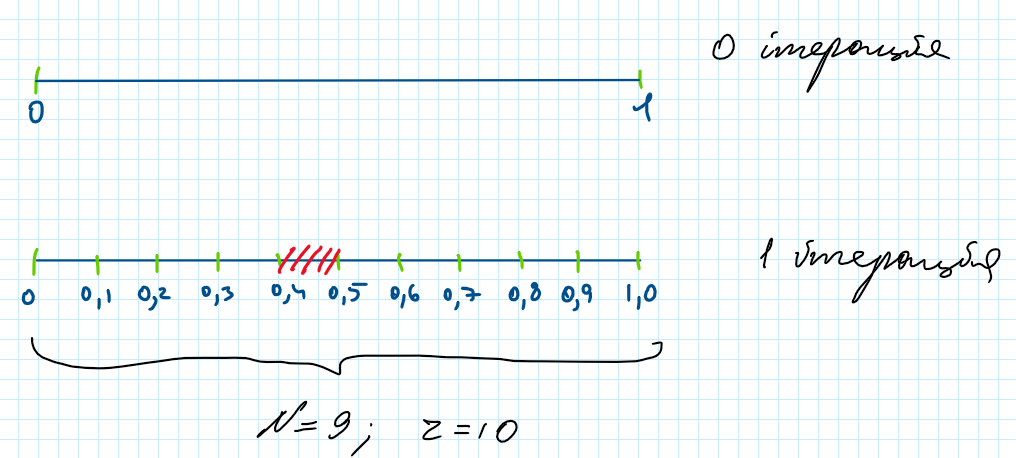

Оскільки

$$N\left(\ \frac{1}{r} \right)^x=1 $$
$$N=9; \space r={10} $$
$$9\cdot\left(\ \frac{1}{10} \right)^x=1 $$
$$\left(\ \frac{1}{10} \right)^x=\frac{1}{9} $$
$$x = \log_{\frac{1}{10}}{\frac{1}{9}} $$
$$x = \log_{10^{-1}}{9^{-1}} $$
$$x = \frac{-1}{-1}\log_{10}{9} = \log_{10}{9} = \lg{9} \implies Фрактальна\spaceрозмірність\space заданого\space фракталу = \lg{9}$$
$$\lg{1} < \lg{9} < \lg{10} \implies 0 < \lg{9} < 1$$
